In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def dist(x,y):
    return ((x**2).sum(1)).reshape(-1,1)-2*np.dot(x,y.T)+((y**2).sum(1)).reshape(1,-1)
     

In [3]:
def knn(x1,x,y,k,d1): 
    r=np.argsort(d1,axis=1)
    kn=r[:,:k]
    y_new=y[kn]
    pred = np.apply_along_axis(lambda row: np.argmax(np.bincount(row)), axis=1, arr=y_new)   
    return pred        

In [4]:
def train_test_split(x,y,test_size):
    m,n=x.shape
    indices=np.arange(m)
    p=np.random.permutation(indices)
    x_test=x[p][:int(m*test_size)]
    y_test=y[p][:int(m*test_size)]
    x_train=x[p][int(m*test_size):]
    y_train=y[p][int(m*test_size):]
    return x_train,y_train,x_test,y_test

In [5]:
df=pd.read_csv('Classification_train.csv')
y_train=df['label']
y_train=y_train.to_numpy()
x_train=df.drop(['label'],axis=1)
x_train=x_train.to_numpy()

In [6]:
x_train1,y_train1,x_cv,y_cv=train_test_split(x_train/255,y_train,0.10)

In [7]:
d1=dist(x_cv,x_train1)     
k=3

In [8]:
p=knn(x_cv,x_train1,y_train1,k,d1)
print("accuracy: ",np.mean(p==y_cv))

accuracy:  0.982


In [25]:
f=10
ap=np.zeros(9)
po=[]
epo=[]
while f<100:
    epo.append(f)
    p=knn(x_cv,x_train1,y_train1,f,d1)
    ep=np.mean(p==y_cv)
    po.append(ep)
    
    print('k: ',f,'    acc: ' ,np.mean(p==y_cv))
    f+=10

k:  10     acc:  0.976
k:  20     acc:  0.9733333333333334
k:  30     acc:  0.97
k:  40     acc:  0.968
k:  50     acc:  0.9664444444444444
k:  60     acc:  0.964
k:  70     acc:  0.9611111111111111
k:  80     acc:  0.9595555555555556
k:  90     acc:  0.9571111111111111


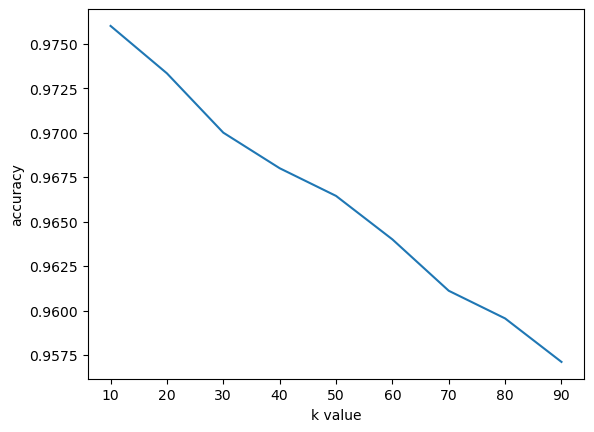

In [26]:
plt.plot(epo,po)
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

In [27]:
f=1
ap=np.zeros(9)
po1=[]
epo1=[]
while f<10:
    epo1.append(f)
    p=knn(x_cv,x_train1,y_train1,f,d1)
    ep=np.mean(p==y_cv)
    po1.append(ep)
    print('k: ',f,'   acc: ' ,np.mean(p==y_cv))
    f+=1

k:  1    acc:  0.9857777777777778
k:  2    acc:  0.9795555555555555
k:  3    acc:  0.9837777777777778
k:  4    acc:  0.9784444444444444
k:  5    acc:  0.9808888888888889
k:  6    acc:  0.9777777777777777
k:  7    acc:  0.9793333333333333
k:  8    acc:  0.9773333333333334
k:  9    acc:  0.9791111111111112


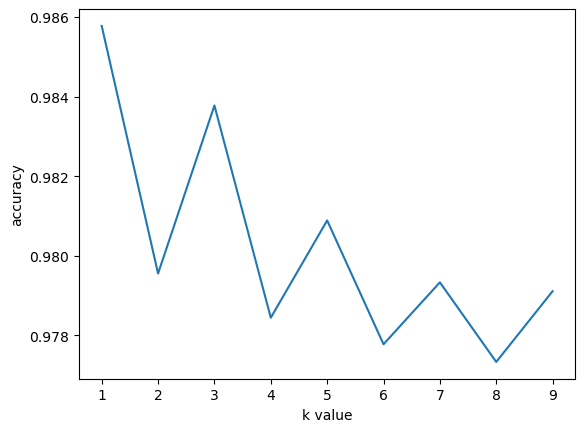

In [28]:
plt.plot(epo1,po1)
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


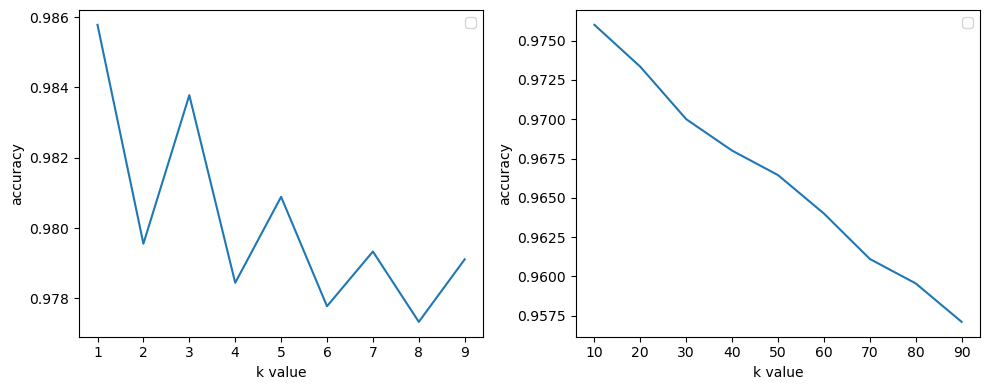

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(epo1, po1)
axs[0].set_xlabel('k value')
axs[0].set_ylabel('accuracy')
axs[1].plot(epo, po)
axs[1].set_xlabel('k value')
axs[1].set_ylabel('accuracy')

for ax in axs:
    ax.legend()
plt.tight_layout()

plt.show()

In [9]:
ot=pd.read_csv('Classification_test.csv')
otid=ot['ID']
otx=ot.drop(['ID'],axis=1)
x_test=otx.to_numpy()/255

In [10]:
type(x_test)

numpy.ndarray

In [11]:
d2=dist(x_test,x_train/255)
p2=knn(x_test,x_train,y_train,3,d2)


In [12]:
np.unique(p2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [27]:
opreddf=pd.DataFrame({'Id': otid,'output': p2})
opreddf.to_csv('Classification_output_knn.csv')

,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,14189,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,14742,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,13905,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,10072,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,14879,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19851,1.967136,-6.819440,3.597360,-0.482508,4.679231,0.861442,8.810749,-20.384415,20.427585,...,1.489196,12.767614,52.530303,20.517596,-42.428871,35.227784,-9.244004,-18.759314,-42.260514,-2.261597
9996,11818,-0.656285,-3.294604,12.222256,-0.184108,8.286414,-6.437312,-19.611691,-13.487207,23.986240,...,9.897794,-15.720693,26.401396,11.421553,-104.558180,-318.607244,-7.446830,-6.457686,12.002813,-20.317446
9997,15552,-0.349932,4.611955,-2.814735,1.851754,-2.354195,6.639817,-25.299515,-3.145723,-41.248652,...,19.601819,-3.216492,-17.299449,-8.975811,59.531358,244.333157,28.656620,11.294024,1.441938,4.395482
9998,12161,0.295833,1.825552,-8.824731,2.119270,-4.629213,-2.354794,0.919091,52.204003,7.350877,...,10.640964,11.686231,7.259193,7.733906,54.680591,-472.335102,-24.281308,-16.099344,10.744757,6.578695
